In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
import seaborn as sbn

In [36]:
filepath = './data/Operaci_n_de_pasajeros_y_despacho_de_veh_culos_en_la_modalidad_de_transporte_de_pasajeros_por_carretera.csv'

df = pd.read_csv(filepath)

df.head(5)

,TERMINAL,CLASE_VEHICULO,NIVEL_SERVICIO,MUNICIPIO_ORIGEN_RUTA,MUNICIPIO_DESTINO_RUTA,FECHA_DESPACHO,HORA_DESPACHO,TIPO_DESPACHO,DESPACHOS,PASAJEROS
0,T.T. DE BOGOTÁ NORTE,MICROBUS,LUJO,11001.0,15759.0,03/01/2021 12:00:00 AM,8.0,TRANSITO,2.0,0.0
1,T.T. DE BOGOTÁ SALITRE,BUS,LUJO,11001.0,76001.0,03/12/2021 12:00:00 AM,11.0,ORIGEN,4.0,45.0
2,T.T. DE CALI,BUSETA,BASICO,76001.0,52378.0,01/09/2021 12:00:00 AM,6.0,ORIGEN,1.0,3.0
3,T.T. DE MELGAR,MICROBUS,BASICO,73449.0,25488.0,02/28/2021 12:00:00 AM,12.0,ORIGEN,1.0,1.0
4,T.T. DE MANIZALES,MICROBUS,LUJO,17001.0,17174.0,01/28/2021 12:00:00 AM,20.0,ORIGEN,1.0,13.0


In [37]:
df1 = df.groupby('CLASE_VEHICULO')['PASAJEROS', 'DESPACHOS'].sum()

In [38]:
df1

,PASAJEROS,DESPACHOS
CLASE_VEHICULO,,
AUTOMOVIL,1395752.0,455596.0
BUS,30605282.0,3430374.0
BUSETA,6570382.0,1110925.0
CAMIONETA,4928482.0,1023067.0
CAMPERO,1139799.0,208924.0
MICROBUS,22846709.0,3452960.0


In [39]:
df['CLASE_VEHICULO'].isna().sum()

5

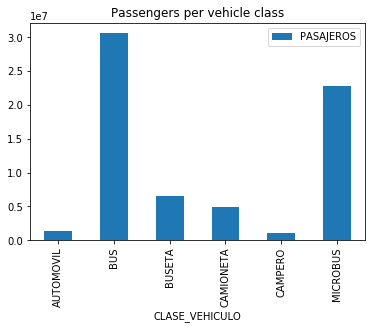

In [54]:
ax = df1.plot.bar(y='PASAJEROS', title='Passengers per vehicle class')

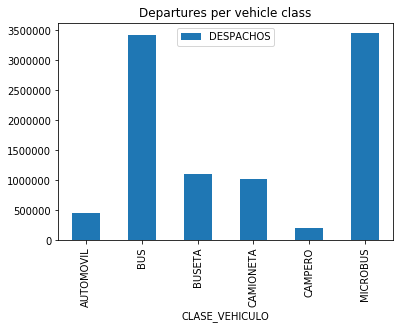

In [55]:
ax = df1.plot.bar(y='DESPACHOS', title='Departures per vehicle class')

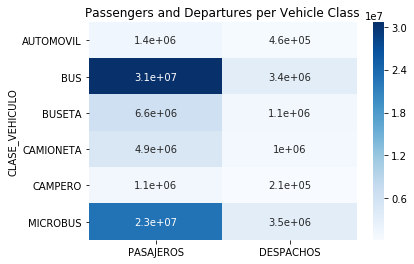

In [56]:
ax2 = plt.axes()
sbn.heatmap(df1, annot=True, cmap='Blues', ax = ax2)
ax2.set_title('Passengers and Departures per Vehicle Class');

In [11]:
df.groupby(['TERMINAL', 'CLASE_VEHICULO'])['PASAJEROS','DESPACHOS'].sum().sort_values('PASAJEROS', ascending = False).head(10)

PASAJEROS  DESPACHOS
TERMINAL               CLASE_VEHICULO                      
T.T. DE MEDELLÍN NORTE BUS             3766915.0   271803.0
T.T. DE BOGOTÁ SALITRE BUS             3700740.0   375641.0
T.T. DE CALI           BUS             3456193.0   391459.0
                       MICROBUS        2729908.0   390848.0
T.T. DE ARMENIA        MICROBUS        2621332.0   377320.0
T.T. DE PEREIRA        MICROBUS        1793283.0   215503.0
T.T. DE CARTAGENA      BUS             1778079.0   235052.0
T.T. DE MEDELLÍN NORTE MICROBUS        1373187.0   137659.0
T.T. DE DUITAMA        MICROBUS        1252616.0   154974.0
T.T. DE POPAYÁN        MICROBUS        1160829.0   101838.0

In [12]:
df.describe()

,MUNICIPIO_ORIGEN_RUTA,MUNICIPIO_DESTINO_RUTA,HORA_DESPACHO,DESPACHOS,PASAJEROS
count,4.916243e+06,4.916243e+06,4.916243e+06,4.916243e+06,4.916243e+06
mean,3.610354e+04,3.976296e+04,1.202961e+01,1.969359e+00,1.372723e+01
std,2.740167e+04,2.708355e+04,5.024672e+00,2.289914e+00,2.173251e+01
min,5.001000e+03,5.001000e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.100100e+04,1.550700e+04,8.000000e+00,1.000000e+00,3.000000e+00
50%,2.300100e+04,4.100100e+04,1.200000e+01,1.000000e+00,8.000000e+00
75%,6.600100e+04,6.807700e+04,1.600000e+01,2.000000e+00,1.600000e+01
max,9.977300e+04,9.977300e+04,2.300000e+01,1.250000e+02,2.200000e+03


In [6]:
df['FECHA_DATE'] = pd.to_datetime(df['FECHA_DESPACHO'])
df['FECHA_DATE'].head()

0   2021-03-01
1   2021-03-12
2   2021-01-09
3   2021-02-28
4   2021-01-28
Name: FECHA_DATE, dtype: datetime64[ns]

In [7]:
df['MONTH'] = df['FECHA_DATE'].dt.month
df['DAY'] = df['FECHA_DATE'].dt.day
df['MONTH'].head()

0    3.0
1    3.0
2    1.0
3    2.0
4    1.0
Name: MONTH, dtype: float64

In [26]:
df2 = df.groupby(['CLASE_VEHICULO','MONTH'])['PASAJEROS','DESPACHOS'].sum()
df2

PASAJEROS  DESPACHOS
CLASE_VEHICULO MONTH                      
AUTOMOVIL      1.0     177951.0    61479.0
               2.0     166996.0    58312.0
               3.0     131687.0    46871.0
               4.0      28578.0    11273.0
               5.0       1541.0      877.0
...                         ...        ...
MICROBUS       8.0    2130259.0   284148.0
               9.0    2382102.0   337081.0
               10.0   2736551.0   396103.0
               11.0   2544514.0   381416.0
               12.0   3204082.0   434468.0

[72 rows x 2 columns]

<Figure size 14400x14400 with 0 Axes>

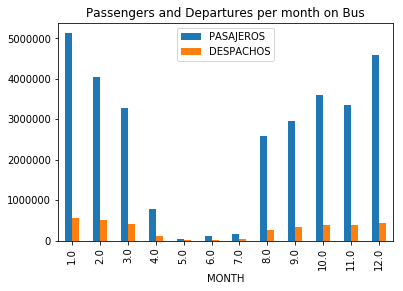

In [57]:
plt.figure(figsize=(200,200))
df2.loc['BUS'].plot(kind='bar', title='Passengers and Departures per month on Bus')

<Figure size 14400x14400 with 0 Axes>

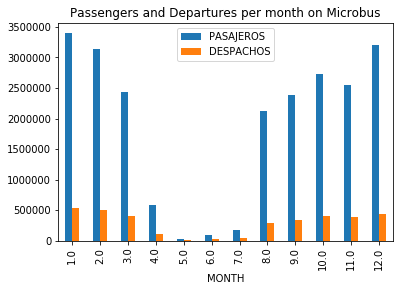

In [59]:
plt.figure(figsize=(200,200))
df2.loc['MICROBUS'].plot(kind='bar', title='Passengers and Departures per month on Microbus')

<Figure size 14400x14400 with 0 Axes>

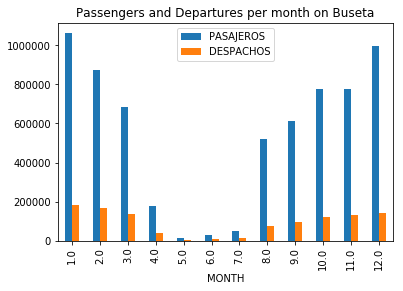

In [60]:
plt.figure(figsize=(200,200))
df2.loc['BUSETA'].plot(kind='bar', title='Passengers and Departures per month on Buseta')

<Figure size 14400x14400 with 0 Axes>

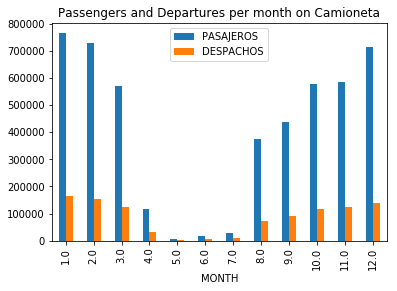

In [61]:
plt.figure(figsize=(200,200))
df2.loc['CAMIONETA'].plot(kind='bar', title='Passengers and Departures per month on Camioneta')

<Figure size 14400x14400 with 0 Axes>

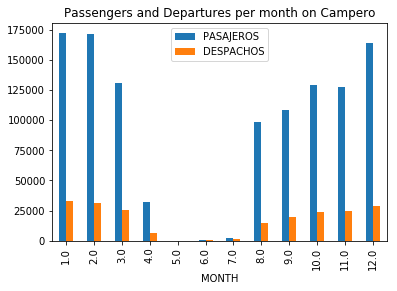

In [62]:
plt.figure(figsize=(200,200))
df2.loc['CAMPERO'].plot(kind='bar', title='Passengers and Departures per month on Campero')

<Figure size 14400x14400 with 0 Axes>

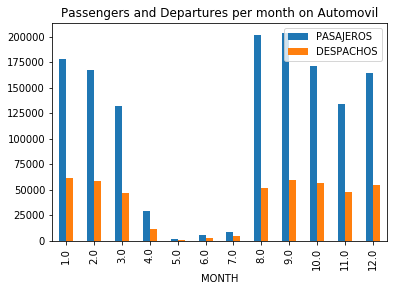

In [63]:
plt.figure(figsize=(200,200))
df2.loc['AUTOMOVIL'].plot(kind='bar', title='Passengers and Departures per month on Automovil')